In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [8]:
X.head() #факторы для предсказания 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head()  #целевая переменная 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
X.shape, y.shape

((768, 8), (768,))

In [12]:
x_train.shape, y_train.shape  #обучающий набор 

((614, 8), (614,))

In [13]:
x_test.shape, y_test.shape

((154, 8), (154,))

In [14]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [15]:
logistic.fit(x_train, y_train)  #обучение модели

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print("Coefficients: \n", logistic.coef_[0])  # коэффициенты

#они определяют вклад каждого фактора в предсказание целевой переменной
#если коэф отрицательный значит: если увеличить значение фактора, то значение целевой переменной уменьшится 

Coefficients: 
 [ 1.14495149e-01  3.26350544e-02 -1.08559045e-02 -1.05354622e-04
 -1.49299868e-03  7.77048512e-02  1.66464057e+00  7.82959563e-03]


In [17]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.114495148938898
Glucose 0.03263505441568465
BloodPressure -0.0108559044891847
SkinThickness -0.0001053546224504054
Insulin -0.0014929986771574555
BMI 0.07770485122637362
DiabetesPedigreeFunction 1.6646405729219171
Age 0.007829595630233504


In [18]:
y_pred = logistic.predict(x_test)


#метод предикт используется для того чтобы определить к какому
#классу относится тот или иной фактор

In [19]:
_ = [print(a, b) for a, b in list(zip(y_test, y_pred))[:10]]

1 1
0 1
0 1
0 0
0 0
1 1
1 1
1 0
1 1
0 0


In [20]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

#матрица ошибок: True negative, False positive
#                False negative, True positive

array([[87,  9],
       [23, 35]])

<Axes: >

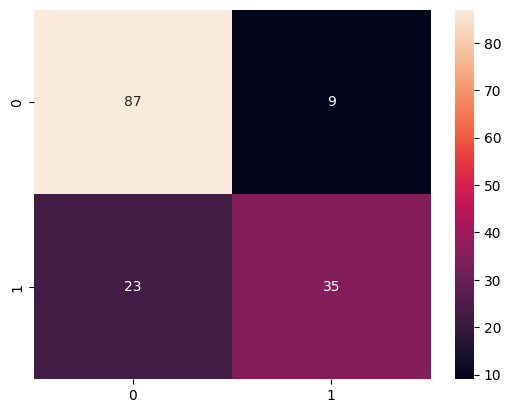

In [21]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [22]:
logistic.score(x_test, y_test)
#средняя точность предсказания на тестовых данных

0.7922077922077922

In [23]:
metrics.accuracy_score(y_test, y_pred)
#тоже средняя точность, но metrics может выдавать точность по recall(полнота), precosion, f1-score

0.7922077922077922

In [24]:
display(metrics.recall_score(y_test, y_pred))
display(metrics.precision_score(y_test, y_pred))
display(metrics.f1_score(y_test, y_pred))

0.603448275862069

0.7954545454545454

0.6862745098039215

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly = PolynomialFeatures(2) #позволяет создавать новые признаки (квадраты старых и их произведения)
poly = poly.fit_transform(X)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.2, random_state=123)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.603448275862069

0.7954545454545454

0.6862745098039215

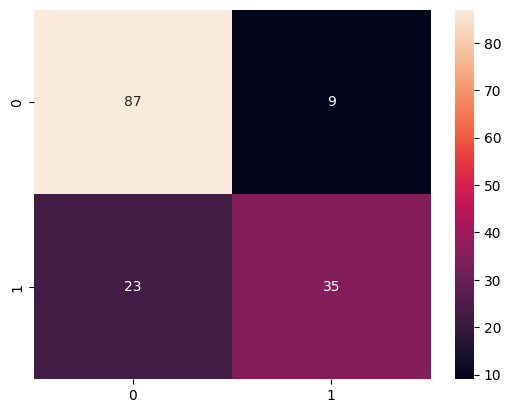

In [27]:
polynomial = LogisticRegression()
polynomial.fit(x_train_p, y_train_p)
y_pred_p = polynomial.predict(x_test_p)

sns.heatmap(metrics.confusion_matrix(y_test_p, y_pred_p), annot=True)

display(metrics.recall_score(y_test_p, y_pred_p))
display(metrics.precision_score(y_test_p, y_pred_p))
display(metrics.f1_score(y_test_p, y_pred_p))

In [28]:
# Метод опорных векторов (SVM)
#Метод машинного обучения для классификации регрессии 
#Идея SVM по своей сути проста — он ищет, как так провести две прямые между категориями, чтобы между ними образовался наибольший зазор.


from sklearn import svm
SVM_c1 = svm.SVC()
SVM_c1.fit(x_train, y_train)
y_pred=SVM_c1.predict(x_test)

0.7792207792207793

0.5172413793103449

0.8333333333333334

0.6382978723404256

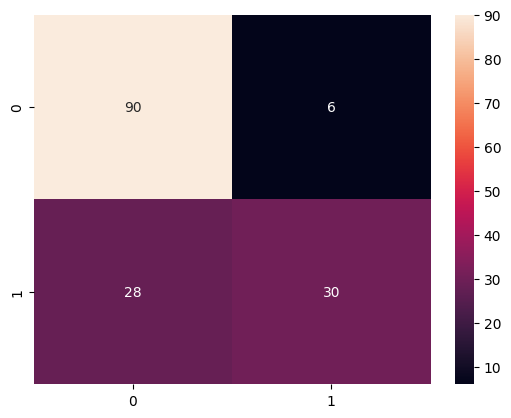

In [29]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

display(metrics.accuracy_score(y_test, y_pred))
display(metrics.recall_score(y_test, y_pred))
display(metrics.precision_score(y_test, y_pred))
display(metrics.f1_score(y_test, y_pred))

0.7792207792207793

0.7068965517241379

0.7068965517241379

0.7068965517241379

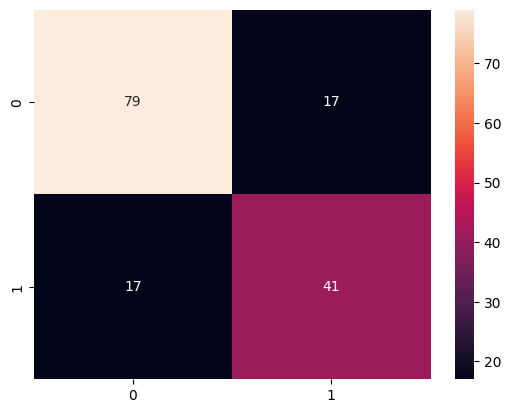

In [30]:
# Деревья с бустингом

from sklearn.ensemble import HistGradientBoostingClassifier
boostingTrees = HistGradientBoostingClassifier()
boostingTrees.fit(x_train, y_train)
y_pred = boostingTrees.predict(x_test)

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

display(metrics.accuracy_score(y_test, y_pred))
display(metrics.recall_score(y_test, y_pred))
display(metrics.precision_score(y_test, y_pred))
display(metrics.f1_score(y_test, y_pred))

#Решение


Изменение аргументов

In [31]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l2')  #penalty уменьшает переобучение модели
#накладывает штраф на сумму квадратов коэфов модели

In [32]:
logistic.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [34]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


Без ядра

In [35]:
from sklearn.svm import SVC
from sklearn import metrics
svm_linear = SVC()
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_linear))

Accuracy: 0.7682291666666666
Confusion matrix:
[[457  43]
 [135 133]]


С линейным ядром

In [36]:
from sklearn.svm import SVC
from sklearn import metrics
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_linear))

Accuracy: 0.77734375
Confusion matrix:
[[443  57]
 [114 154]]


Гауссово ядро

In [37]:
from sklearn.svm import SVC
from sklearn import metrics
svm_linear = SVC(kernel='rbf')
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_linear))

Accuracy: 0.7682291666666666
Confusion matrix:
[[457  43]
 [135 133]]


Полиноминальное ядро

In [38]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X, y)
y_pred_svm_poly = svm_poly.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_poly))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_poly))

Accuracy: 0.7760416666666666
Confusion matrix:
[[465  35]
 [137 131]]


Метод ближайших соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((652, 8), (116, 8), (652,), (116,))

In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
print(f'accuracy: {accuracy_score(y_test, model.predict(X_test)) :.3}')

accuracy: 0.664


Многослойный перцептрон

In [43]:
from sklearn.neural_network import MLPClassifier

# Создание модели
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=0)

# Обучение модели
mlp.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [44]:
# Оценка качества
score = mlp.score(X_test, y_test)
print(f"Accuracy: {score:.3f}")

Accuracy: 0.767


Дерево решений

Accuracy: 0.6896551724137931
Confusion matrix:
[[58 22]
 [14 22]]


[Text(0.48527922453703703, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.458\nsamples = 652\nvalue = [420, 232]'),
 Text(0.24949363425925927, 0.9, 'x[7] <= 30.5\ngini = 0.318\nsamples = 414\nvalue = [332, 82]'),
 Text(0.1801215277777778, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.176\nsamples = 257\nvalue = [232, 25]'),
 Text(0.14380787037037038, 0.7666666666666667, 'x[0] <= 7.5\ngini = 0.159\nsamples = 253\nvalue = [231, 22]'),
 Text(0.09895833333333333, 0.7, 'x[5] <= 30.95\ngini = 0.141\nsamples = 249\nvalue = [230, 19]'),
 Text(0.037037037037037035, 0.6333333333333333, 'x[7] <= 28.5\ngini = 0.043\nsamples = 137\nvalue = [134, 3]'),
 Text(0.018518518518518517, 0.5666666666666667, 'x[6] <= 0.672\ngini = 0.016\nsamples = 125\nvalue = [124, 1]'),
 Text(0.009259259259259259, 0.5, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(0.027777777777777776, 0.5, 'x[0] <= 2.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.018518518518518517, 0.43333333333333335, 'gini = 0.0\nsamples

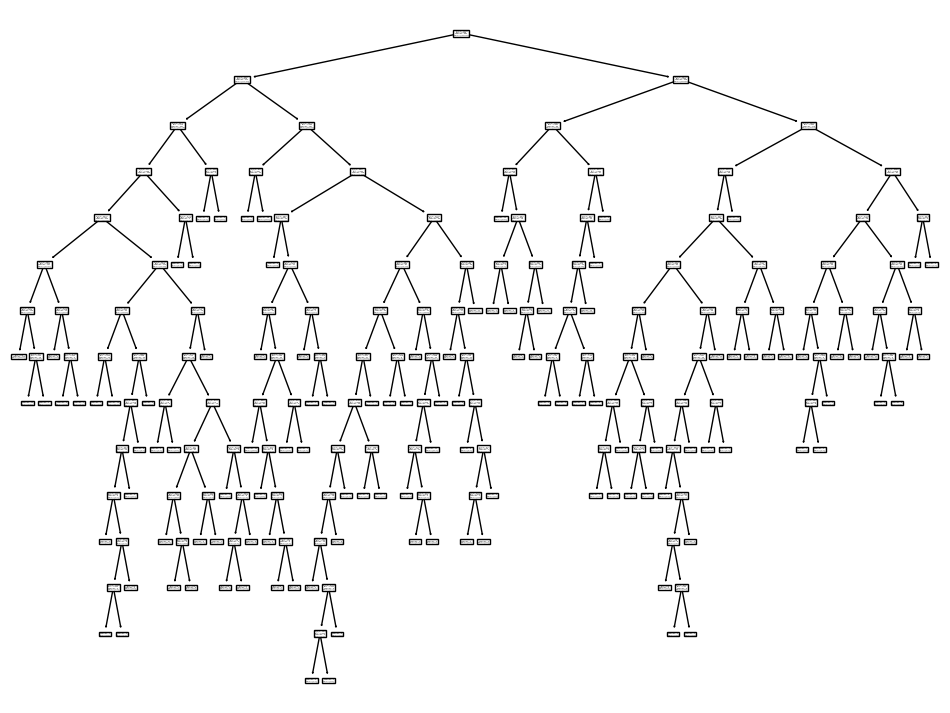

In [46]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Создание объекта классификатора
clf = DecisionTreeClassifier()

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Предсказание классов для тестовой выборки
y_pred = clf.predict(X_test)

# Оценка точности классификации
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Вывод матрицы классификации
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

plt.figure(figsize=(12, 9))
plot_tree(clf)

Наивный байес

In [48]:
from sklearn.naive_bayes import GaussianNB  #Формула наивного байеса: P(A|B)=(P(B|A)*P(A))/P(B)
gnb = GaussianNB()
gnb.fit(X_train, y_train)   #Служит для сортировки (пример со спамом на почте)
y_pred = gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7844827586206896
Confusion matrix:
 [[68 12]
 [13 23]]


Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def evaluate_models():
    models = []
    models.append(('SVM no kernel', SVC()))
    models.append(('SVM linear', SVC(kernel='linear', C=1)))  #параметр c: отвечает за баланс между точностью и переобучением
    models.append(('SVM rbf', SVC(kernel='rbf', C=1)))
    models.append(('SVM poly', SVC(kernel='poly', degree=3, C=1)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('MLP', MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('Naive Bayes', GaussianNB()))
    
    results = []
    for name, model in models:
        model_pipeline = make_pipeline(StandardScaler(), model)
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc, confusion_matrix(y_test, y_pred)))
    return results

In [50]:
evaluate_models()

[('SVM no kernel',
  0.7586206896551724,
  array([[71,  9],
         [19, 17]])),
 ('SVM linear',
  0.7931034482758621,
  array([[72,  8],
         [16, 20]])),
 ('SVM rbf',
  0.7586206896551724,
  array([[71,  9],
         [19, 17]])),
 ('SVM poly',
  0.7068965517241379,
  array([[72,  8],
         [26, 10]])),
 ('KNN',
  0.7586206896551724,
  array([[70, 10],
         [18, 18]])),
 ('MLP',
  0.75,
  array([[67, 13],
         [16, 20]])),
 ('Decision Tree',
  0.7068965517241379,
  array([[61, 19],
         [15, 21]])),
 ('Naive Bayes',
  0.7844827586206896,
  array([[68, 12],
         [13, 23]]))]

Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [51]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# загрузка данных
iris = load_iris()

# преобразуем данные в DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]


# проверим, что все загрузилось корректно
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# разделение на признаки и метки
X = iris_df.drop(['target', 'species'], axis=1)
y = iris_df['target']

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# определение моделей
def evaluate_models():
    models = []
    models.append(('SVM no kernel', SVC()))
    models.append(('SVM linear', SVC(kernel='linear', C=1)))
    models.append(('SVM rbf', SVC(kernel='rbf', C=1)))
    models.append(('SVM poly', SVC(kernel='poly', degree=3, C=1)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('MLP', MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('Naive Bayes', GaussianNB()))
    
    results = []
    for name, model in models:
        model_pipeline = make_pipeline(StandardScaler(), model)
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc, confusion_matrix(y_test, y_pred)))
    return results

In [54]:
evaluate_models()

[('SVM no kernel',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('SVM linear',
  0.9777777777777777,
  array([[19,  0,  0],
         [ 0, 12,  1],
         [ 0,  0, 13]])),
 ('SVM rbf',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('SVM poly',
  0.9555555555555556,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  2, 11]])),
 ('KNN',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('MLP',
  0.28888888888888886,
  array([[ 0,  0, 19],
         [ 0,  0, 13],
         [ 0,  0, 13]])),
 ('Decision Tree',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('Naive Bayes',
  0.9777777777777777,
  array([[19,  0,  0],
         [ 0, 12,  1],
         [ 0,  0, 13]]))]

In [55]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score


# загружаем датасет ирисов
iris = load_iris()

# создаем датафрейм с данными и целевым признаком
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]

# проверим, что все загрузилось корректно
print(iris_df.head())

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# обучаем модель логистической регрессии
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# выводим матрицу классификации и оценку точности для логистической регрессии
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))

# обучаем модель метода опорных векторов (SVM) с линейным ядром
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train, y_train)
y_pred_svc_lin = svc_lin.predict(X_test)

# выводим матрицу классификации и оценку точности для SVM с линейным ядром
print("\nSVM with Linear Kernel:")
print(confusion_matrix(y_test, y_pred_svc_lin))
print("Accuracy: ", accuracy_score(y_test, y_pred_svc_lin))

# обучаем модель метода ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# выводим матрицу классификации и оценку точности для метода ближайших соседей
print("\nK-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

# обучаем модель многослойного перцептрона
mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# выводим матрицу классификации и оценку точности для многослойного перцептрона
print("\nMultilayer Perceptron:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Accuracy: ", accuracy_score(y_test, y_pred_mlp))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
Logistic Regression:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy:  1.0

SVM with Linear Kernel:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy:  1.0

K-Nearest Neighbors:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy:  1.0

Multilayer Perceptron:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy:  0.9666666666666667
Accuracy: 1.0
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Отличия моделей классификации: 
Алгоритмы: метод опорных векторов, наивный байес, деревья, случайный лес\
Параметры, которые передаются: например параметр c в методе опорных векторов\
Сложность: сложность для классификации, например наивного байеса обойти очень легко, добавить противоположную вероятность

Метрика регрессии: Все метрики показывают точность модели регрессии
Основные метрики: MSE MAE RMSE И R^2\

MSE-измеряет среднеквадратическое отклонение между предсказанными значениями и фактическими значениями \
R^2-показывает как хорошо модель соответствует данным (значение находится в диапазоне от 0 до 1, где 1 это наибольшая точность)\
RMSE-делает тоже самое что и mse, только ее значение находится в том же формате как и целевая переменная\
MAE-средняя абсолютная ошибка, показывает среднее значение абсолютных различий между предсказанными значениями целевой переменной

Коэффициенты линейной регрессии показывают влияние каждого признака на вероятность принадлежности объекта к определенному классу. Если коэф положительный, то при увеличении значения признака вероятность принадлежности повысится. Если коэф отрицательный то вероятность наоборот понизится

Матрица классификации: она имеет 4 поля:\
True positive - объект был верно отнесен к положительному классу\
False positive - объект был неверно отнесен к положительному классу\
False negative - объект был неверно отнесен к отрицательному классу\
True positive -  объект был верно отнесен к отрицательному классу\
(из этой матрицы мы можем вычислить различные метрики точность, полнота, F1-score, accuracy)\
TN  FP\
FN  TP

Атрибуты конструктора объекта логистической регрессии: = объекту\
penalty - параметр для регулировки\
C - обратное значение penalty\
fit_intersept - должен ли быть расчитан свободный член\
max_iter - максимальное кол-во итераций для сходимости\
tol - порог остановки оптимизационного алгоритма\
random_state - 1 раз генерировать случайные значения\
coef_ - массив коэффициентов соответствующих каждому из признаков модели

Параметры и атрибуты других моделей машинного обучения:\
Из общих можно выделить:\
fit(X,y) - метод обучения на данных X и целевой y\
predict(X) - метод для предсказания меток классов на новых данных X 
score(X,y) - метод для вычисления точности (accuracy)
get_params() - метод для получения текущих параметров модели
set_params() - метод для установки новых параметров модели